# Iowa Housing Group Project
## STAD 2019

###### First, we handle all imports. We are primarily using pandas and numpy for our data management and manipulation; matplotlib and seaborn for visualization; sklearn and scipy for the ML models and performance metrics.

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm
from scipy import stats
import numpy as np
from sklearn import preprocessing 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

###### We read in the "train.csv" file into a Pandas dataframe and print out our columns for reference.

In [55]:
ames_train_data = pd.read_csv('train.csv')
ames_train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

###### Data Preprocessing, Step 1: drop "subjective" columns - OverallQual, OverallCond, ExterQual, ExterCond, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, HeatingQC, KitchenQual, Functional, FireplaceQu, GarageFinish, GarageQual, GarageCond, PoolQC, Fence, LotShape, LandContour, LandSlope. Also, we drop "YrSold" and "MoSold" - these columns are problematic and not helpful to our end product.

In [56]:
ames_train_data.drop(['Id', 'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'LotShape', 'LandContour', 'LandSlope', 'YrSold', 'MoSold'], axis=1, inplace=True)



###### Here, we check for missing data, and output the top 10 results. The tenth "result" YearRemodAdd reveals that we only have 9 categories with missing values.

In [57]:
ames_train_data.isnull().sum().sort_values(ascending = False).head(10)

MiscFeature    1406
Alley          1369
LotFrontage     259
GarageType       81
GarageYrBlt      81
BsmtQual         37
MasVnrArea        8
MasVnrType        8
Electrical        1
BsmtFinSF1        0
dtype: int64

###### Data Preprocessing, Step 2: Remove Columns With High Percentage of Missing Data

In [58]:
ames_train_data.drop(['MiscFeature', 'Alley', 'LotFrontage'], axis=1, inplace=True)

###### Data Preprocessing, Step 3: Remove Rows with Missing Values

In [59]:
ames_train_data_numerical = ames_train_data.select_dtypes([np.number]).columns
# for i in ames_train_data_numerical:
#     median=ames_train_data[i].mode()
#     ames_train_data[i].fillna(median)

for i in ames_train_data.columns:
    ames_train_data.dropna(subset=[i], inplace=True)  #drop NA (missing data) in the column,

###### Feature Selection - calculate and display R^2 for each numerical variable. [This also gives us the list to review for nominal numerical categorical variables.]

In [60]:
ames_train_data_numerical = ames_train_data.select_dtypes([np.number]).columns

def takeCoef(elem):
    return elem[1]

correlations = []
for i in ames_train_data_numerical:
    coef = np.corrcoef(ames_train_data[i], ames_train_data['SalePrice'])
    correlations.append((i, (coef[0][1] ** 2)))

correlations_sorted = sorted(correlations, key=takeCoef, reverse=True)

for i in correlations_sorted:
    print("Column: ", i[0], "\t Correlation(R^2): ", i[1])

print(len(correlations_sorted))

Column:  SalePrice 	 Correlation(R^2):  1.0
Column:  GrLivArea 	 Correlation(R^2):  0.5061234892664396
Column:  GarageCars 	 Correlation(R^2):  0.41045995580385414
Column:  GarageArea 	 Correlation(R^2):  0.36979719525172255
Column:  1stFlrSF 	 Correlation(R^2):  0.36604622513305063
Column:  TotalBsmtSF 	 Correlation(R^2):  0.3604669243032966
Column:  FullBath 	 Correlation(R^2):  0.3243169528936342
Column:  TotRmsAbvGrd 	 Correlation(R^2):  0.30442814384886235
Column:  YearBuilt 	 Correlation(R^2):  0.2546428006318735
Column:  YearRemodAdd 	 Correlation(R^2):  0.2517535513883513
Column:  GarageYrBlt 	 Correlation(R^2):  0.2323990346909284
Column:  MasVnrArea 	 Correlation(R^2):  0.21743267612019027
Column:  Fireplaces 	 Correlation(R^2):  0.1985705915973509
Column:  BsmtFinSF1 	 Correlation(R^2):  0.12983406018455665
Column:  OpenPorchSF 	 Correlation(R^2):  0.10358038510184749
Column:  2ndFlrSF 	 Correlation(R^2):  0.09626961040583962
Column:  WoodDeckSF 	 Correlation(R^2):  0.093041

In [61]:
# Convert nominal numerical categorical data to strings:
# ames_train_data['MSSubClass'] = ames_train_data['MSSubClass'].astype(str)

In [62]:
ames_train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1340 entries, 0 to 1459
Data columns (total 55 columns):
MSSubClass       1340 non-null int64
MSZoning         1340 non-null object
LotArea          1340 non-null int64
Street           1340 non-null object
Utilities        1340 non-null object
LotConfig        1340 non-null object
Neighborhood     1340 non-null object
Condition1       1340 non-null object
Condition2       1340 non-null object
BldgType         1340 non-null object
HouseStyle       1340 non-null object
YearBuilt        1340 non-null int64
YearRemodAdd     1340 non-null int64
RoofStyle        1340 non-null object
RoofMatl         1340 non-null object
Exterior1st      1340 non-null object
Exterior2nd      1340 non-null object
MasVnrType       1340 non-null object
MasVnrArea       1340 non-null float64
Foundation       1340 non-null object
BsmtQual         1340 non-null object
BsmtFinSF1       1340 non-null int64
BsmtFinSF2       1340 non-null int64
BsmtUnfSF        1340 no

In [63]:
ames_train_data.head()

,MSSubClass,MSZoning,LotArea,Street,Utilities,LotConfig,Neighborhood,Condition1,Condition2,BldgType,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,AllPub,Inside,CollgCr,Norm,Norm,1Fam,...,0,61,0,0,0,0,0,WD,Normal,208500
1,20,RL,9600,Pave,AllPub,FR2,Veenker,Feedr,Norm,1Fam,...,298,0,0,0,0,0,0,WD,Normal,181500
2,60,RL,11250,Pave,AllPub,Inside,CollgCr,Norm,Norm,1Fam,...,0,42,0,0,0,0,0,WD,Normal,223500
3,70,RL,9550,Pave,AllPub,Corner,Crawfor,Norm,Norm,1Fam,...,0,35,272,0,0,0,0,WD,Abnorml,140000
4,60,RL,14260,Pave,AllPub,FR2,NoRidge,Norm,Norm,1Fam,...,192,84,0,0,0,0,0,WD,Normal,250000


In [65]:
col_list = list(ames_train_data.columns)
for idx, label in enumerate(col_list):
    print(idx,":",label)

0 : MSSubClass
1 : MSZoning
2 : LotArea
3 : Street
4 : Utilities
5 : LotConfig
6 : Neighborhood
7 : Condition1
8 : Condition2
9 : BldgType
10 : HouseStyle
11 : YearBuilt
12 : YearRemodAdd
13 : RoofStyle
14 : RoofMatl
15 : Exterior1st
16 : Exterior2nd
17 : MasVnrType
18 : MasVnrArea
19 : Foundation
20 : BsmtQual
21 : BsmtFinSF1
22 : BsmtFinSF2
23 : BsmtUnfSF
24 : TotalBsmtSF
25 : Heating
26 : CentralAir
27 : Electrical
28 : 1stFlrSF
29 : 2ndFlrSF
30 : LowQualFinSF
31 : GrLivArea
32 : BsmtFullBath
33 : BsmtHalfBath
34 : FullBath
35 : HalfBath
36 : BedroomAbvGr
37 : KitchenAbvGr
38 : TotRmsAbvGrd
39 : Fireplaces
40 : GarageType
41 : GarageYrBlt
42 : GarageCars
43 : GarageArea
44 : PavedDrive
45 : WoodDeckSF
46 : OpenPorchSF
47 : EnclosedPorch
48 : 3SsnPorch
49 : ScreenPorch
50 : PoolArea
51 : MiscVal
52 : SaleType
53 : SaleCondition
54 : SalePrice


In [66]:
# Encode non-numerical and numerical categorical data:

ames_train_data_categorical = ames_train_data.select_dtypes(include=['object']).columns
print(len(ames_train_data_categorical))
ames_train_data = pd.get_dummies(ames_train_data)

# normalize LotArea,TotalBsmtSF,1stFlrSF,GrLivArea,TotRmsAbvGrd
log=["LotArea","TotalBsmtSF","1stFlrSF","GrLivArea","TotRmsAbvGrd"]
for i in log:
    ames_train_data[i] = np.log1p(ames_train_data[i])

23


In [67]:
# Define and remove Y from data
Y = ames_train_data['SalePrice']
ames_train_data.drop(["SalePrice"], axis=1, inplace=True)

# Define features
features = ['GrLivArea', 'GarageCars']

# test all features

x = ames_train_data

In [68]:
#split train.csv into 20 % for validation and 80% for train
x_train, x_val,y_train,y_val = train_test_split(x, Y, test_size= .2, random_state=0)

print("Train set has {}".format(x_train.shape[0]))
print("Validation set has {}".format(x_val.shape[0]))

Train set has 1072
Validation set has 268


### Define and Fit Models:

In [81]:
# Decision Tree
decTreeReg = DecisionTreeRegressor(random_state = 0)
decTreeReg.fit(x_train, y_train)

# Random Forest
randomForestReg = RandomForestRegressor(random_state = 0)
randomForestReg.fit(x_train, y_train)

# Lasso
lasso1=Lasso(alpha=0.05,normalize=True)
lasso1.fit(x_train,y_train)

# Ridge
ridge1=Ridge(alpha=0.05,normalize=True)
ridge1.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6090421732.206421, tolerance: 698353954.1514357
  positive)


Ridge(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)

### Make Predictions:

In [82]:
predDT = decTreeReg.predict(x_val)
predRF = randomForestReg.predict(x_val)
predL = lasso1.predict(x_val)
predR = ridge1.predict(x_val)

### Calculate MAE (Mean Average Error)

In [83]:
decisionTreeMAE = mean_absolute_error(predDT, y_val) # 23192.20895522388 # Encoding: 23046.988805970148
randomForestMAE = mean_absolute_error(predRF, y_val) # 18686.317537313433 # Encoding: 18871.216791044775
lassoMAE = mean_absolute_error(predL, y_val) # 19516.631671630043 # Encoding: 19758.633342932753
ridgeMAE = mean_absolute_error(predR, y_val) # 18822.669089402567 # Encoding: 18818.902286782017

### Calculate MAPE (Mean Absolute Percentage Error)

In [84]:
decisionTreeMAPE = np.mean(np.abs((y_val - predDT) / y_val)) * 100
randomForestMAPE = np.mean(np.abs((y_val - predRF) / y_val)) * 100
lassoMAPE = np.mean(np.abs((y_val - predL) / y_val)) * 100
ridgeMAPE = np.mean(np.abs((y_val - predR) / y_val)) * 100

### Output Results:

In [85]:
print("Decision Tree \t\t MAE: ", decisionTreeMAE, "\t MAPE: ", decisionTreeMAPE)
print("Random Forest \t\t MAE: ", randomForestMAE, "\t MAPE: ", randomForestMAPE)
print("Lasso Regression \t MAE: ", lassoMAE, "\t MAPE: ", lassoMAPE)
print("Ridge Regression \t MAE: ", ridgeMAE, "\t MAPE: ", ridgeMAPE) 

Decision Tree 		 MAE:  22236.514925373136 	 MAPE:  12.99571336503472
Random Forest 		 MAE:  18413.876865671642 	 MAPE:  10.514704225438344
Lasso Regression 	 MAE:  19976.067720153445 	 MAPE:  11.34105177262664
Ridge Regression 	 MAE:  19867.052705739723 	 MAPE:  11.364888131370739


In [88]:
print(type(decisionTreeMAE))

<class 'numpy.float64'>


### Save to File:

In [130]:
method = "VDT_VRF_VLR_VRR_2"

with open('test.csv', 'a') as f:
    #f.write("Method, DecisionTreeMAE, DecisionTreeMAPE, RandomForestMAE, RandomForestMAPE, LassoMAE, LassoMAPE, RidgeMAE, RidgeMAPE\n")
    f.write('{}, {}, {}, {}, {}, {}, {}, {}, {}\n'.format(method, decisionTreeMAE, decisionTreeMAPE, randomForestMAE, randomForestMAPE, lassoMAE, lassoMAPE, ridgeMAE, ridgeMAPE))

In [178]:
our_results = pd.read_csv('test.csv')

In [179]:
our_results.columns

Index(['Method', ' DecisionTreeMAE', ' DecisionTreeMAPE', ' RandomForestMAE',
       ' RandomForestMAPE', ' LassoMAE', ' LassoMAPE', ' RidgeMAE',
       ' RidgeMAPE'],
      dtype='object')

In [180]:
our_results.head()

,Method,DecisionTreeMAE,DecisionTreeMAPE,RandomForestMAE,RandomForestMAPE,LassoMAE,LassoMAPE,RidgeMAE,RidgeMAPE
0,VDT_VRF_VLR_VRR,22236.514925,12.995713,18413.876866,10.514704,19976.06772,11.341052,19867.052706,11.364888
1,VDT_VRF_VLR_VRR_2,25000.514925,12.995713,20000.876866,10.514704,22000.06772,11.341052,23000.052706,11.364888


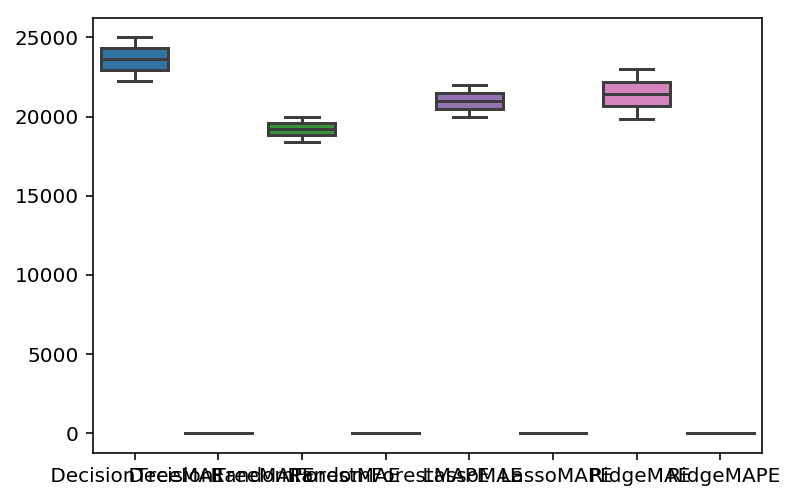

In [181]:
sns.boxplot(data=our_results)

In [176]:
ax = sns.boxplot(x=, y="SalePrice",data=ames_train_data)
plt.show()

SyntaxError: invalid syntax (<ipython-input-176-aede7ae26489>, line 1)